In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
HO = pd.read_csv('.//CME_HO1.csv', index_col=0)
NG = pd.read_csv('.//CME_NG1.csv', index_col=0)

In [6]:
HO.index = pd.to_datetime(HO.index, format='%m/%d/%Y')
NG.index = pd.to_datetime(NG.index, format='%m/%d/%Y')

In [7]:
HO = HO.sort_index()
NG = NG.sort_index()

In [8]:
HO.head()

,Close
Date,
1991-01-02,0.7330
1991-01-03,0.7024
1991-01-04,0.6830
1991-01-07,0.7617
1991-01-08,0.7430


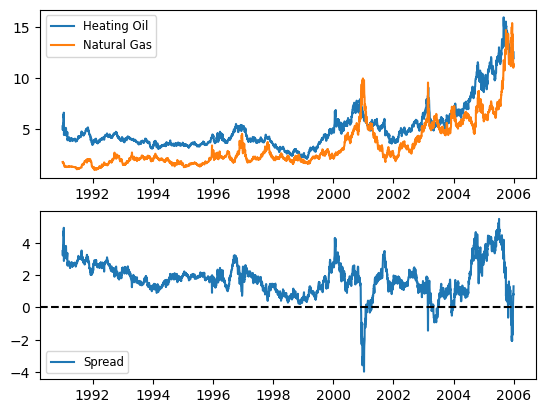

In [9]:
# Plot the prices separately
plt.subplot(2, 1, 1)
plt.plot(7.25 * HO, label='Heating Oil');
plt.plot(NG, label='Natural Gas');
plt.legend(loc='best', fontsize='small');

# Plot the spread
plt.subplot(2, 1, 2)
plt.plot(7.25 * HO - NG, label='Spread');
plt.legend(loc='best', fontsize='small');
plt.axhline(y=0, linestyle='--', color='k');

In [10]:
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO['Close'] - NG['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])



The p-value for the ADF test on HO is  0.9567108785017873
The p-value for the ADF test on NG is  0.900874744467673
The p-value for the ADF test on the spread is  7.019439302142211e-05


In [12]:
BTC = pd.read_csv('.//BTC.csv', index_col=0)
ETH = pd.read_csv('.//ETH.csv', index_col=0)

In [13]:
BTC.index = pd.to_datetime(BTC.index, format='%Y-%m-%d')
ETH.index = pd.to_datetime(ETH.index, format='%Y-%m-%d')

In [14]:
import statsmodels.api as sm

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC, ETH).fit()

# Compare ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b * ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

The p-value for the ADF test is  0.023369002323472953


C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_38800\2669731008.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = result.params[1]


In [15]:
# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC,ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

The p-value for the ADF test is  0.023369002323472953


C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_38800\3088620801.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = result.params[1]


In [17]:
temp_NY = pd.read_csv('.//NOAA_TAVG.csv', index_col=0)
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')
temp_NY.head()

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3


The p-value for the ADF test is  0.5832938987871121


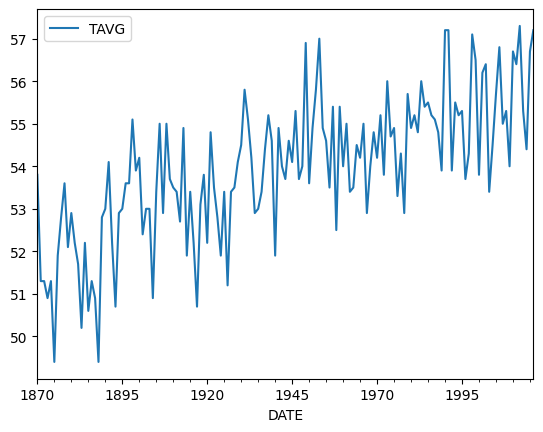

In [18]:
# Plot average temperatures
temp_NY.plot();

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

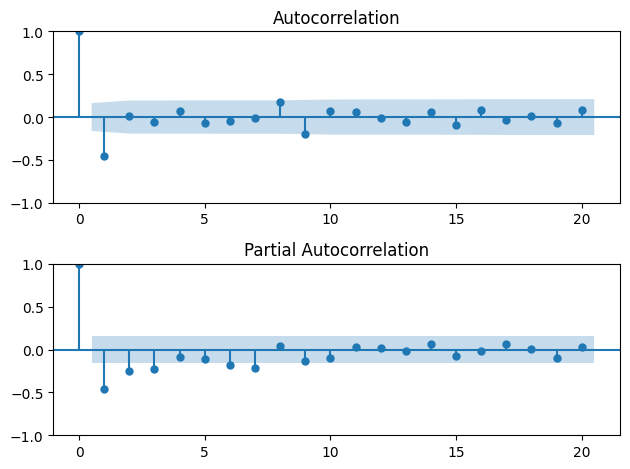

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2, 1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0]);

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1]);

plt.tight_layout()

In [20]:
# from statsmodels.tsa.arima_model import ARMA

# # Fit the data to an AR(1) model and print AIC:
# mod_ar1 = ARMA(chg_temp, order=(1, 0))
# res_ar1 = mod_ar1.fit()
# print("The AIC for an AR(1) is: ", res_ar1.aic)

# # Fit the data to an AR(2) model and print AIC
# mod_ar2 = ARMA(chg_temp, order=(2, 0))
# res_ar2 = mod_ar2.fit()
# print("The AIC for an AR(2) is: ", res_ar2.aic)

# # fit the data to an ARMA(1, 1) model and print AIC
# mod_arma11 = ARMA(chg_temp, order=(1, 1))
# res_arma11 = mod_arma11.fit()
# print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [21]:
# Import the module for estimating an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARIMA(chg_temp, order=(1,0,0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARIMA(chg_temp, order=(2,0,0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARIMA(chg_temp, order=(1,0,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppDa

The AIC for an AR(1) is:  510.5346898733109
The AIC for an AR(2) is:  501.92741234091363
The AIC for an ARMA(1,1) is:  469.07291879070664


In [22]:
# from statsmodels.tsa.arima_model import ARIMA

# # Forecast temperatures using an ARIMA(1,1,1) model
# mod = ARIMA(temp_NY, order=(1,1,1))
# res = mod.fit()

# # Plot the original series and the forecasted series
# res.plot_predict(start='1872-01-01', end='2046-01-01');
# plt.savefig('../images/tavg_predict.png')

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


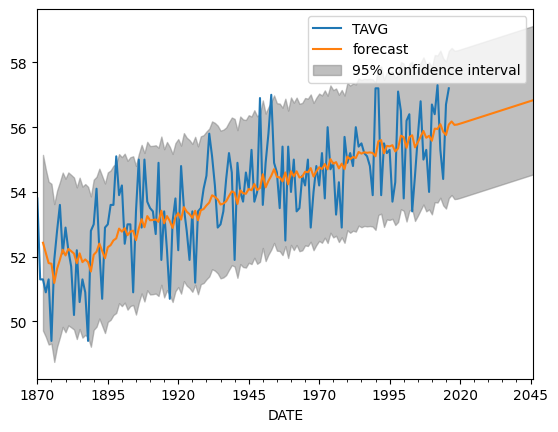

<Figure size 640x480 with 0 Axes>

In [24]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, trend='t', order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
fig, ax = plt.subplots()
temp_NY.plot(ax=ax)
plot_predict(res, start='1872', end='2046', ax=ax)
plt.show()
plt.savefig('./tavg_predict.png')
